I will execute a full EDA and predictive analysis on this kernel. My plan is to heavily rely on three-dimensional data visualization throughout my EDA to help me carefully define my new features and add predictive power to  my model.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Any results you write to the current directory are saved as output.

In [2]:
data = pd.read_csv('data/HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


Exploratory Data Analysis
=========================

In [3]:
data["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

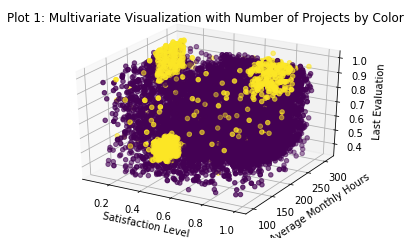

In [4]:
## There is some definite clusters where people leave.
## It would be interesting to see if clusters to the top left and right that hold on
# .. eventually end up in the cluster at the borrom left

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = data['satisfaction_level']
y = data['average_montly_hours']
z = data['last_evaluation']
c = data['left']
_ = ax.scatter(xs=x, ys=y, zs=z, c=c)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Plot 1: Multivariate Visualization with Number of Projects by Color')
plt.show()

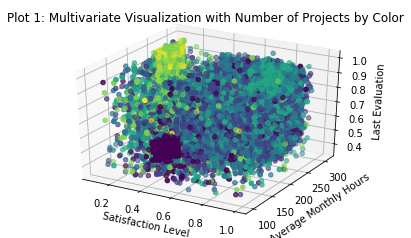

In [5]:
# This shows me something interesting, evaluation is more related to hours worked than
# number of projects
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = data['satisfaction_level']
y = data['average_montly_hours']
z = data['last_evaluation']
c = data['number_project']
_ = ax.scatter(xs=x, ys=y, zs=z, c=c)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Plot 1: Multivariate Visualization with Number of Projects by Color')
plt.show()

The light square of observations in the back top corner of this plot seems to represent a group of employees who a) work very long hours, b) do a huge number of projects, c) are evaluated very well for their additional efforts, and d) hate their jobs. I'll call these the 'workhorses' of this company. I've captured them in a separate feature and plotted them again. I like refining my features in this way because it allows me to make tiny adjustments to my various parameters (in this case the satisfaction level) to ensure that my feature captures exactly the values that I want it to represent.

There is also an obvious group of employees (the big black blob) that a) do few projects, b) work a fairly average number of hours (around 160/month, what you would expect from a salaried full time employee), c) get very poor evaluations, and d) don't care for their jobs. I'll call these the 'disengaged' of this company and capture them in a separate feature as well.

It is interesting to note that the two most obvious groupings here based on the number of projects each employee works are both at the low end of the satisfaction metric. This seems to indicate that either too many or too few projects correlate to low satisfaction, even though the impact on average working hours and evaluations are radically different. 

We can identify 689 employees who fit the 'workhorse' description according to this analysis; notice the axes shifted


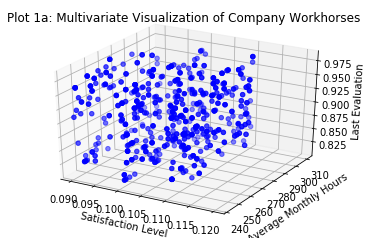

We can identify 582 employees who fit the 'disengaged' description according to this analysis.


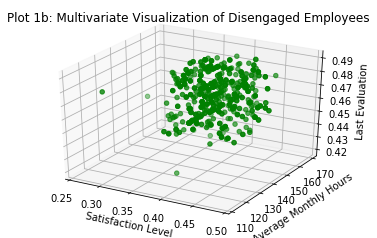

In [6]:
pd.options.mode.chained_assignment = None
data['workhorses'] = 0
data['workhorses'][(data['number_project'] >= 6) & (data['average_montly_hours'] > 200) & (data['satisfaction_level'] < 0.130) & (data['last_evaluation'] > 0.8)] = 1
print("We can identify {} employees who fit the 'workhorse' description according to this analysis; notice the axes shifted".format(len(data[data['workhorses'] == 1])))

workhorsedf = data[data['workhorses'] == 1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = workhorsedf['satisfaction_level']
y = workhorsedf['average_montly_hours']
z = workhorsedf['last_evaluation']
_ = ax.scatter(xs=x, ys=y, zs=z, c='blue')
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Plot 1a: Multivariate Visualization of Company Workhorses')
plt.show()

data['disengaged'] = 0
data['disengaged'][(data['number_project'] <= 2) & (data['average_montly_hours'] <= 170) & (data['average_montly_hours'] > 110) & (data['satisfaction_level'] < 0.50) & (data['satisfaction_level'] > 0.20) & (data['last_evaluation'] < 0.50) & (data['last_evaluation'] > 0.41)] = 1
print("We can identify {} employees who fit the 'disengaged' description according to this analysis.".format(len(data[data['disengaged'] == 1])))

disengageddf = data[data['disengaged'] == 1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = disengageddf['satisfaction_level']
y = disengageddf['average_montly_hours']
z = disengageddf['last_evaluation']
_ = ax.scatter(xs=x, ys=y, zs=z, c='green')
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Plot 1b: Multivariate Visualization of Disengaged Employees')
plt.show()

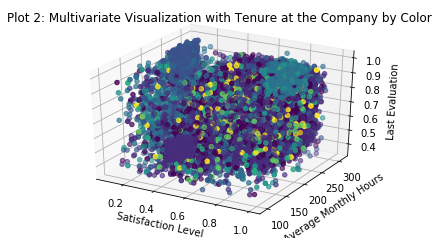

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = data['satisfaction_level']
y = data['average_montly_hours']
z = data['last_evaluation']
c = data['time_spend_company']
_ = ax.scatter(xs=x, ys=y, zs=z, c=c)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Plot 2: Multivariate Visualization with Tenure at the Company by Color')
plt.show()

There is a significant group of employees with significant experience who work long hours, get great evaluations, and are highly satisfied. Looking at the previous plot we can see that they also take on a fair number of projects, although not enough to become part of the crowd of burnouts. Perhaps we can select these individuals out into a separate feature and call them our 'veterans'.

It is interesting to note that our group of 'disengaged' employees are also quite junior and that our 'workhorses' are more senior but typically not as much as the 'veterans'. It is entirely possible that a key issue in this company is a failure to give adequate responsibility to junior employees (leading to disengagement) and overworking those who have proven their abilities (leading to burnout). 

Of course at this point this is only a hypothesis.

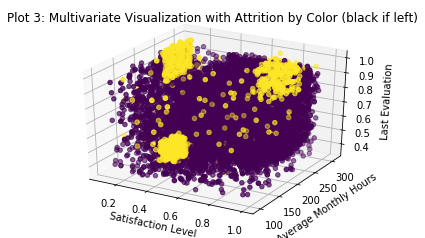

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = data['satisfaction_level']
y = data['average_montly_hours']
z = data['last_evaluation']
c = data['left']
_ = ax.scatter(xs=x, ys=y, zs=z, c=c)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Plot 3: Multivariate Visualization with Attrition by Color (black if left)')
plt.show()

Interesting. This is not what I expected but it is exciting to see. It looks like ALL THREE of our already identified groups are the ones who are  leaving the company in the largest numbers. These three groups contain almost all the attrition experienced by the entire firm. 

An immediate hypothesis that springs to mind to explain this variance goes as follows:
1. 'Workhorses' leave because they are burned out.
2. 'Disengaged' employees leave because they don't like their job.
3. 'Veterans' leave because they either retire or are offered attractive job opportunities elsewhere. Given their high evaluations, satisfaction, and tenure I like the retirement narrative a little better. 

Now that I can clearly see the importance of my 'veterans' group I'll create a feature to capture them and then use another 3D visualization to ensure I've got the right folks.

We can identify 1801 employees who fit the 'veteran' description according to this analysis.


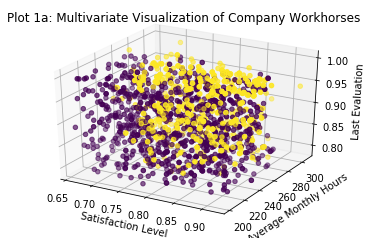

In [9]:
data['veterans'] = 0
data['veterans'][(data['number_project'] >= 3) & (data['average_montly_hours'] > 200) & (data['satisfaction_level'] > 0.65) & (data['satisfaction_level'] < .93) & (data['last_evaluation'] > 0.78)] = 1
print("We can identify {} employees who fit the 'veteran' description according to this analysis.".format(len(data[data['veterans'] == 1])))

veteransdf = data[data['veterans'] == 1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = veteransdf['satisfaction_level']
y = veteransdf['average_montly_hours']
z = veteransdf['last_evaluation']
c = veteransdf['left']
_ = ax.scatter(xs=x, ys=y, zs=z, c=c)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Plot 1a: Multivariate Visualization of Company Workhorses')
plt.show()

This isn't nearly as clean a subdivision as the previous two features I created, but I'm still pleased with it and quite confident that it will contribute significant improvements to the predictive power of potential machine learning models.

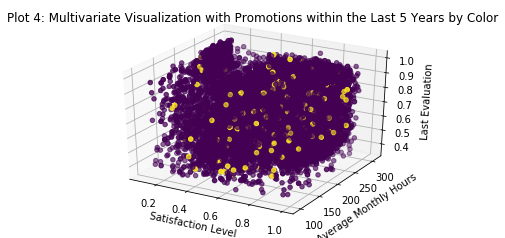

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = data['satisfaction_level']
y = data['average_montly_hours']
z = data['last_evaluation']
c = data['promotion_last_5years']
_ = ax.scatter(xs=x, ys=y, zs=z, c=c)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Plot 4: Multivariate Visualization with Promotions within the Last 5 Years by Color')
plt.show()

No visually discernible pattern here. It is interesting (though probably irrelevant for this analysis) to note that folks do not get promoted very often in this company. This may indicate a tendency to hire from outside the company. We can explore that later with a histogram of employee tenure. Further it doesn't seem that those who perform well gets promoted either.

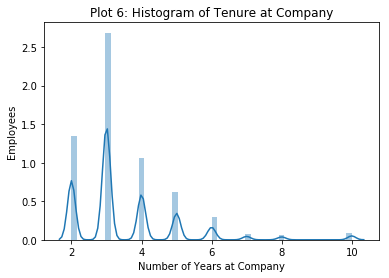

In [11]:
_ = sns.distplot(data['time_spend_company'])
_ = plt.title('Plot 6: Histogram of Tenure at Company')
_ = plt.xlabel('Number of Years at Company')
_ = plt.ylabel('Employees')
plt.show()

This seems to confirm my hunch that this company doesn't really promote from within. Even the old-timers at this company only have about 10 years of service, and the mode is only 3 years. It's interesting to note that the old-timers (largely captured in our 'veterans') are leaving with only ten years at the company. This may imply that it is not retirement that causes them to leave but something else. Perhaps better financial compensation elsewhere? Without a great deal of additional information (at a minimum salaries for company employees and average salaries for like employees in the same industry) it is not possible to really explore this idea.

That said, the last thing I want to look at is the salary data (such as it is).

In [12]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,workhorses,disengaged,veterans
0,0.38,0.53,2,157,3,0,1,0,sales,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,1,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,0,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,0,0,0,0


In [13]:
data["salary"].value_counts()

0    7316
1    6446
2    1237
Name: salary, dtype: int64

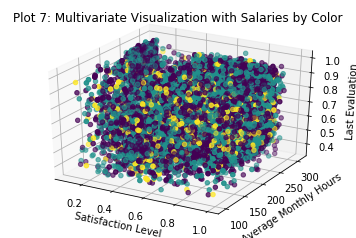

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = data['satisfaction_level']
y = data['average_montly_hours']
z = data['last_evaluation']
c = data['salary']
_ = ax.scatter(xs=x, ys=y, zs=z, c=c)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Plot 7: Multivariate Visualization with Salaries by Color')
plt.show()

It appears suspiciously as though salaries are not tied to either performance or tenure at the firm. I say this chiefly because the previous visualizations strongly brought those features out, but this one seems to show salaries scattered at random through the company. At a minimum one might expect a pile of low salaries among our 'disengaged' employees and high ones among our 'veterans'. Lets take a look and see.

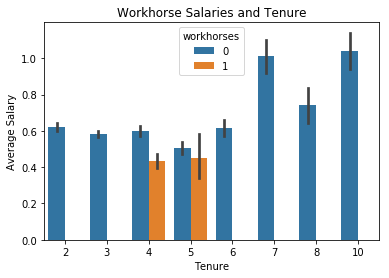

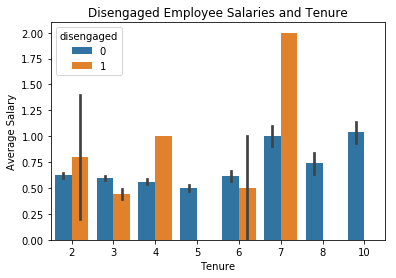

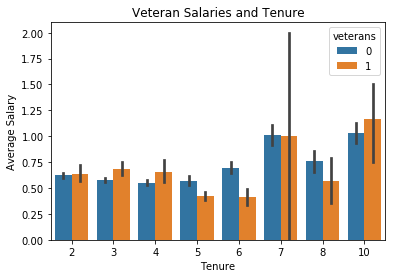

In [15]:
_ = sns.barplot(x='time_spend_company', y='salary', data=data, hue='workhorses')
_ = plt.title('Workhorse Salaries and Tenure')
_ = plt.xlabel('Tenure')
_ = plt.ylabel('Average Salary')
plt.show()

_ = sns.barplot(x='time_spend_company', y='salary', data=data, hue='disengaged')
_ = plt.title('Disengaged Employee Salaries and Tenure')
_ = plt.xlabel('Tenure')
_ = plt.ylabel('Average Salary') 
plt.show()

_ = sns.barplot(x='time_spend_company', y='salary', data=data, hue='veterans')
_ = plt.title('Veteran Salaries and Tenure')
_ = plt.xlabel('Tenure')
_ = plt.ylabel('Average Salary')
plt.show()

Looks like our workhorses are compensated a little below average for their above average levels of effort while our disengaged employees' compensation varies wildly. Veteran's seem to track fairly well with the company average.

It seems that in general performance is not reflected in employee compensation in this firm. To explore this idea I will look at performance vs. compensation in the sales department. If any department is compensated for performance it is probably the sales team. If this is NOT the case then I will assume that no one is compensated relative to their contributions to this firm.

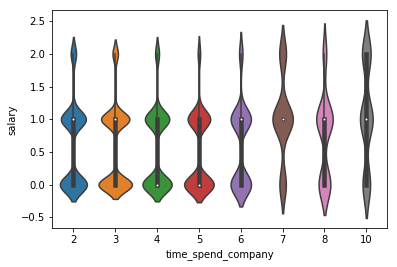

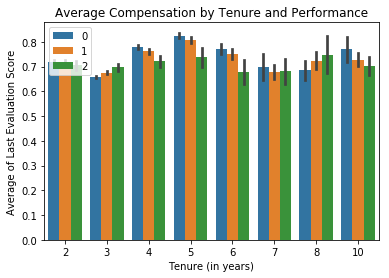

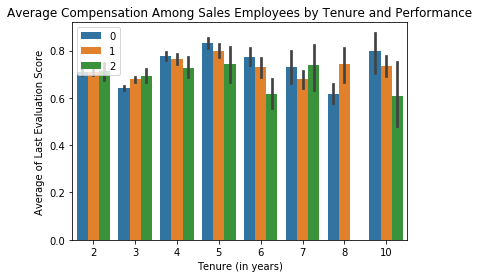

The correlation between evaluated performance and employee salaries is [[ 1.         -0.01300152]
 [-0.01300152  1.        ]].


In [16]:
_ = sns.violinplot(x='time_spend_company', y='salary', data=data)
plt.show()

_ = sns.barplot(x='time_spend_company', y='last_evaluation', hue='salary', hue_order=[0, 1, 2], data=data)
_ = plt.xlabel('Tenure (in years)')
_ = plt.ylabel('Average of Last Evaluation Score')
_ = plt.title('Average Compensation by Tenure and Performance')
_ = plt.legend(loc=2)
plt.show()

sales = data[data['sales'] == 'sales']
_ = sns.barplot(x='time_spend_company', y='last_evaluation', hue='salary', hue_order=[0, 1, 2], data=sales)
_ = plt.xlabel('Tenure (in years)')
_ = plt.ylabel('Average of Last Evaluation Score')
_ = plt.title('Average Compensation Among Sales Employees by Tenure and Performance')
_ = plt.legend(loc=2)
plt.show()

corr = np.corrcoef(x=data['last_evaluation'], y=data['salary'])
print('The correlation between evaluated performance and employee salaries is {}.'.format(corr))

So for both the average employee of the company and for the sales department in particular it appears that compensation is not tied to performance. In fact there is a tiny *negative* correlation between the two (although it is so small it is basically irrelevant). We can effectively say that there is no correlation at all between the two. This is quite troubling. If I was actually consulting with a real firm for this analysis I would attempt to dive into considerable detail at this point and try to identify the likely outcome this is having on company performance.

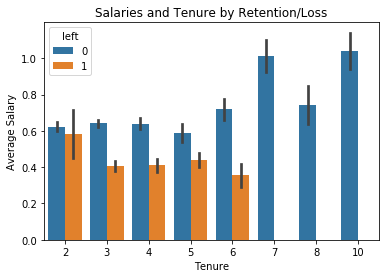

In [17]:
_ = sns.barplot(x='time_spend_company', y='salary', data=data, hue='left')
_ = plt.title('Salaries and Tenure by Retention/Loss')
_ = plt.xlabel('Tenure')
_ = plt.ylabel('Average Salary')
plt.show()

Looks like employees with more than seven years don't leave the firm. I'll create another feature to capture this observation and label these folks my 'seniors'.

In [18]:
data['seniors'] = 0
data['seniors'][data['time_spend_company'] > 6] = 1
print("There are {} 'seniors' at this firm.".format(len(data[data['seniors'] == 1])))

There are 564 'seniors' at this firm.


Last thing I will do to finish up this EDA is take a look at my various departments. First I'll change the column name (because it is irritating), then I'll see if any obvious patterns emerge in a 3D scatter plot.

In [19]:
data = data.rename(columns={'sales':'department'})

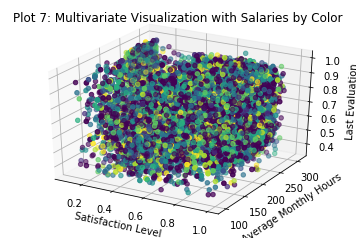

In [20]:
data['dep'] = 1
data['dep'][data['department'] == 'accounting'] = 2
data['dep'][data['department'] == 'hr'] = 3
data['dep'][data['department'] == 'technical'] = 4
data['dep'][data['department'] == 'support'] = 5
data['dep'][data['department'] == 'management'] = 6
data['dep'][data['department'] == 'IT'] = 7
data['dep'][data['department'] == 'product_mng'] = 8
data['dep'][data['department'] == 'RandD'] = 9

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = data['satisfaction_level']
y = data['average_montly_hours']
z = data['last_evaluation']
c = data['dep']
_ = ax.scatter(xs=x, ys=y, zs=z, c=c)
_ = ax.set_xlabel('Satisfaction Level')
_ = ax.set_ylabel('Average Monthly Hours')
_ = ax.set_zlabel('Last Evaluation')
_ = plt.title('Plot 7: Multivariate Visualization with Salaries by Color')
plt.show()

It looks suspiciously like the department to which an employee is assigned basically has nothing to do with the other issues we've identified so far. This is unexpected and a bit perplexing. I had assumed that these problems might be localized within a single function, but this appears to be untrue.

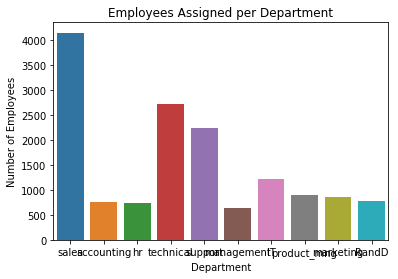

In [21]:
_ = sns.countplot(x='department', data=data)
_ = plt.xlabel('Department')
_ = plt.ylabel('Number of Employees')
_ = plt.title('Employees Assigned per Department')
plt.show()

Looks like most of our employees work in sales, the technical department, and support. Let's see how these departments have been affected by turnover using a seaborn factorplot.

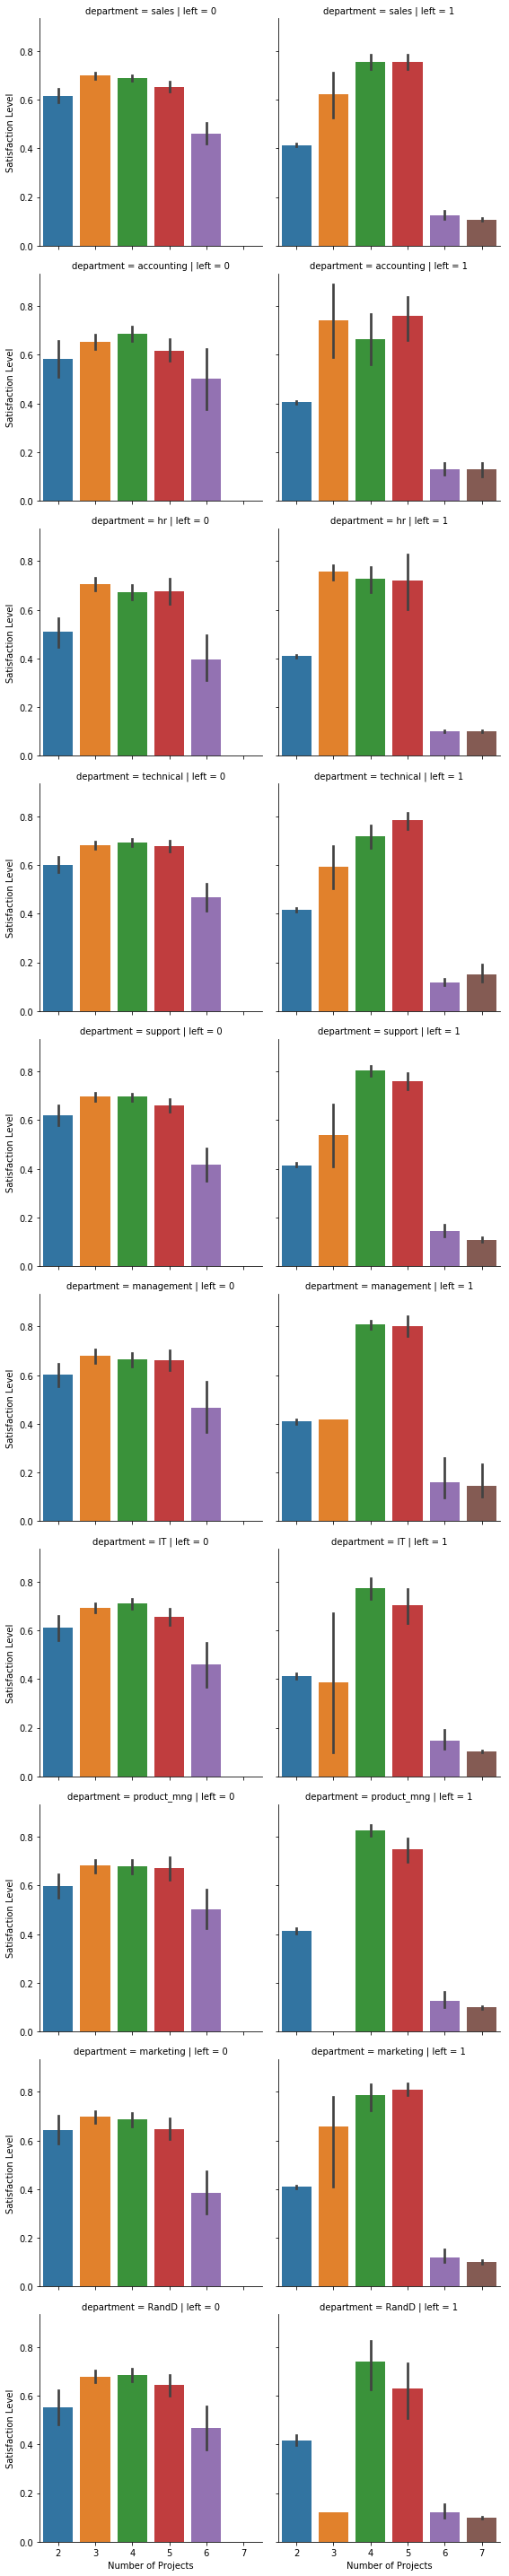

In [22]:
fp = sns.factorplot(x='number_project', y='satisfaction_level', col='left', row='department', kind='bar', data=data)
_ = fp.set_axis_labels('Number of Projects', 'Satisfaction Level')
_ = fp.set_xticklabels(['2','3','4','5','6','7'])
plt.show()

OK, so what do we see here?

Sales - Employees who left were both highly satisfied and had 3-5 projects. This places them in our ‘veterans’ category. There were also some with few projects and lower satisfaction (disengaged) and a few with a very high number of projects and very low satisfaction (workhorses). I don’t see anything here I haven’t already captured.

Accounting, HR, Technical, Support, Management – Same general distribution as what we see in the Sales department.

IT and Marketing – These are similar in some respects to the other departments, but there is wild variation in the satisfaction levels of people with 3 projects who left.

Product Management – Similar to most of the rest of the departments. Satisfaction is extraordinarily high among those who left with 4-5 projects and extraordinarily low among those with more than 5. Still nothing here that doesn’t fit into our previous observations, however.

RandD – Strikingly similar to Product Management, although with more variation in satisfaction levels among those who left. 

Well, that does it for EDA for now. There is quite a bit more I can do in this vein, and if I was working on my home machine I certainly would. But in the interest of not crashing my kernel and still getting this analysis finished I will move on.

Feature Engineering
===================

Now that we've had a chance to thoroughly  'roll around' in the data (as one of my favorite blog posts put it so eloquently) its time to do some additional feature engineering and then get on with the business of building our models.

I've already created features to capture workhorses, disengaged employees, veterans, and seniors. I've also created a couple (salaries and dep) to provide a numeric equivalent to some categorical features. I could have used sklearn's preprocessing LabelEncoder to do this but I chose to do it manually. 

I have seen on other kernels on this dataset that some folks have used KMeans clustering by 'left', but this is cheating since I can't know in advance which employees will leave. I could never use that method to predict whether employees from a different dataset who *haven't* left will leave. So I won't use that technique.

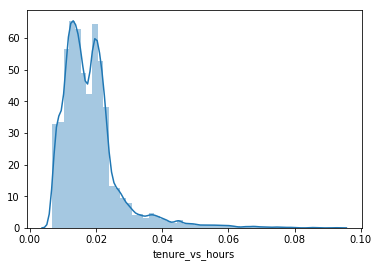

[[1.         0.06110538]
 [0.06110538 1.        ]] [[ 1.         -0.09587533]
 [-0.09587533  1.        ]]


In [23]:
data['tenure_vs_hours'] = data['time_spend_company'] / data['average_montly_hours']
_ = sns.distplot(data['tenure_vs_hours'])
plt.show()

x = np.corrcoef(x=data['tenure_vs_hours'], y=data['left'])
y = np.corrcoef(x=data['tenure_vs_hours'], y=data['satisfaction_level'])
print(x, y)

This first feature captures the number of hours worked relative to an employees tenure at the company. It has a very small positive correlation to an employee leaving and a somewhat higher negative correlation to employee satisfaction. We'll see when it comes time to start looking at feature importances whether this is really important. Now I'll go ahead and compute a few more features capturing simple relationships between some of my existing features.

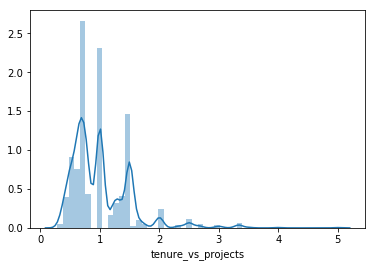

[[1.         0.18169542]
 [0.18169542 1.        ]] [[ 1.         -0.07690095]
 [-0.07690095  1.        ]]


In [24]:
data['tenure_vs_projects'] = data['time_spend_company'] / data['number_project']
_ = sns.distplot(data['tenure_vs_projects'])
plt.show()
x = np.corrcoef(x=data['tenure_vs_projects'], y=data['left'])
y = np.corrcoef(x=data['tenure_vs_projects'], y=data['satisfaction_level'])
print(x, y)

Looks like we're capturing some interesting variance here around both propensity to leave and satisfaction level.

Just as an aside, I'm choosing to informally evaluate the usefulness of these new features based on their correlation to whether and employee left and their satisfaction level. I think it is working out. We'll see when it comes time to start making predictions.

Another aside - I really like using histograms to look at these features after I've created them to see if they make intuitive sense. I've discarded a couple of options as I've gone through this process (though I won't include those in this kernel for the sake of saving space).

In [25]:
del data['department']

Well, that's a wrap for creating new features. This dataset started out with 10 features and now has 25. On to the next step!

Principle Component Analysis (PCA) and Scaling
============================

First I'll get everything scaled so my models can learn from it more easily, then I'll do some PCA. I'll split my train and test sets out prior to the unsupervised learning so that I can finish the business end of my analysis once my machine learning work is complete.

In [26]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,workhorses,disengaged,veterans,seniors,dep,tenure_vs_hours,tenure_vs_projects
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,1,0.019108,1.500000
1,0.80,0.86,5,262,6,0,1,0,1,0,0,1,0,1,0.022901,1.200000
2,0.11,0.88,7,272,4,0,1,0,1,1,0,0,0,1,0.014706,0.571429
3,0.72,0.87,5,223,5,0,1,0,0,0,0,1,0,1,0.022422,1.000000
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,1,0.018868,1.500000


In [27]:
from sklearn import preprocessing

x = data
scaler = preprocessing.scale(x)
cols = x.columns
data1 = pd.DataFrame(scaler, columns=cols, index=data.index)
data1['left'] = data['left']

In [28]:
from sklearn.decomposition import PCA
X = data
Y = X['left']
del X['left']

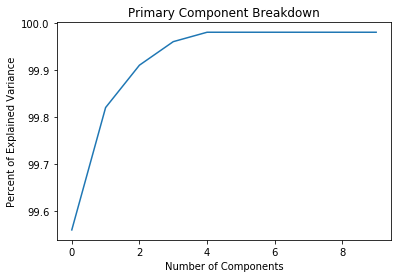

[99.56 99.82 99.91 99.96 99.98 99.98 99.98 99.98 99.98 99.98]


In [29]:
pca = PCA(n_components=10)
X = pca.fit_transform(X)
var = pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
_ = plt.plot(var1)
_ = plt.xlabel('Number of Components')
_ = plt.ylabel('Percent of Explained Variance')
_ = plt.title('Primary Component Breakdown')
plt.show()
print(var1)

Well, how about that. All that feature engineering work and practically all of my variance is explained in the first 5 components. I suppose this isn't surprising. A lot of my new features were probably highly correlated with one another since they consisted of multiple recombinations of just a few key items. Doing the PCA helps me weed out the signal from the noise (thank you Nate Silver) and trim my data down to just what I need to make an accurate predictive model.

I'll take the first eight components on this list and drive on. There is apparently no additional information to be gleaned from the remaining sixteen, as you can see from both the plot and the explained variance ratios above.

In [30]:
pca = PCA(n_components=3)
X = pca.fit_transform(X)
print(X.shape)

(14999, 3)


Modeling and Prediction
=======================

It's finally time to do what I set out to do - make some predictions! I'll split out my train and test sets first, then run a bunch of models to get a feel for what works best.

First I'll create a function to give me my total number of true/false positives and negatives. This is important because simply knowing the percentage I get correct is not enough. To understand the likely impact on the business I need to have an estimate of 

1. What we can do to retain folks and how much we will spend (on average) on those efforts for each employee identified as likely to leave.

2. What it costs to replace an employee who leaves.

3. How we can minimize the total cost of our retention efforts given that some money will likely be wasted on folks who don't need it and some folks not targeted who should be. Also we'll need to track the success of our efforts among those we target. If we know that among those we identify as a 'flight risk' some percentage are actually false positives we give ourselves a baseline we must rise above to start considering that we have achieved something in our retention efforts. At this point we can pull out some standard frequentist statistical tools and start calculating the effects of our retention program. But we'll get to that later.

To do this analysis I'll make a few simplifying assumptions. This might not be necessary in a firm with a rich enough historical dataset or with a good feel for the effectiveness of its retention programs, but I have no such information available to me here. So I'll use the following numbers:

1. Replacing an employee costs 16% of annual salary for low paying jobs, 20% for mid-paying jobs, and 213% for high paying jobs. These estimates come from a 2012 Center for American Progress report. This sounds rather spendy, but is actually a rather conservative estimate compared to some sources.

2. Retention efforts cost 50% of the expected replacement cost for every employee identified as requiring such efforts by my predictive model. Importantly, this means that I will doubtless spend some money on people who don't actually need that incentive because my models are not perfect.

4. Retention efforts will achieve 60% effectiveness.

Time to define my scoring functions and see what my models give me.

In [31]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,workhorses,disengaged,veterans,seniors,dep,tenure_vs_hours,tenure_vs_projects
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,1,0.019108,1.500000
1,0.80,0.86,5,262,6,0,0,1,0,0,1,0,1,0.022901,1.200000
2,0.11,0.88,7,272,4,0,0,1,1,0,0,0,1,0.014706,0.571429
3,0.72,0.87,5,223,5,0,0,0,0,0,1,0,1,0.022422,1.000000
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,1,0.018868,1.500000


In [36]:
def outcomes_score(test_df, outcome_array):
    """Summarize the true/false positives/negatives identified by my model"""
    
    compare = pd.DataFrame(index=test_df.index)
    compare['test'] = test_df
    compare['prediction'] = outcome_array

    # Compute total and percentage of true positives

    compare['True Positive'] = 0
    compare['True Positive'][(compare['test'] == 1) & (compare['prediction'] == 1)] = 1
    truepospercent = np.round(np.sum(compare['True Positive']) / len(compare.index) * 100, decimals=2)
    truepostotal = np.sum(compare['True Positive'])

    # Compute total and percentage of true negatives

    compare['True Negative'] = 0
    compare['True Negative'][(compare['test'] == 0) & (compare['prediction'] == 0)] = 1
    truenegpercent = np.round(np.sum(compare['True Negative']) / len(compare.index) * 100, decimals=2)
    truenegtotal = np.sum(compare['True Negative'])

    # Compute total and percentage of true negatives

    compare['False Positive'] = 0
    compare['False Positive'][(compare['test'] == 0) & (compare['prediction'] == 1)] = 1
    falsepospercent = np.round(np.sum(compare['False Positive']) / len(compare.index) * 100, decimals=2)
    falsepostotal = np.sum(compare['False Positive'])

    # Compute total and percentage of false negatives

    compare['False Negative'] = 0
    compare['False Negative'][(compare['test'] == 1) & (compare['prediction'] == 0)] = 1
    falsenegpercent = np.round(np.sum(compare['False Negative']) / len(compare.index) * 100, decimals=2)
    falsenegtotal = np.sum(compare['False Negative'])

    print('There are {}, or {}%, true positives.'.format(truepostotal, truepospercent))
    print('There are {}, or {}%, true negatives.'.format(truenegtotal, truenegpercent))
    print("Congratulations! You have correctly identified {}, or {}%, of the observed outcomes.".format(truepostotal + truenegtotal, truepospercent + truenegpercent))
    print('There are {}, or {}%, false positives.'.format(falsepostotal, falsepospercent))
    print('There are {}, or {}%, false negatives.'.format(falsenegtotal, falsenegpercent))
    print("Bummer! You incorrectly identified {}, or {}%, of the observed outcomes.".format(falsenegtotal + falsepostotal, falsepospercent + falsenegpercent))
    
def bottomline_score(test_df, outcome_array):
    """Summarize the true/false positives/negatives identified by my model"""
    
    discard_train, verify_test, dscore_train, vscore_test = train_test_split(data, Y, test_size=0.33, random_state=42)
    
    compare = pd.DataFrame(verify_test, columns=data.columns)
    compare['test'] = test_df
    compare['prediction'] = outcome_array
    compare['left'] = Y
    
    compare['estimated_salary'] = 0
    compare['estimated_salary'][compare['salary'] == 1] = 30000
    compare['estimated_salary'][compare['salary'] == 2] = 60000
    compare['estimated_salary'][compare['salary'] == 3] = 90000

    # Compute total and percentage of true positives

    compare['True Positive'] = 0
    compare['True Positive'][(compare['test'] == 1) & (compare['prediction'] == 1)] = 1
    truepospercent = np.sum(compare['True Positive']) / len(compare.index) * 100
    truepostotal = np.sum(compare['True Positive'])

    # Compute total and percentage of true negatives

    compare['True Negative'] = 0
    compare['True Negative'][(compare['test'] == 0) & (compare['prediction'] == 0)] = 1
    truenegpercent = np.sum(compare['True Negative']) / len(compare.index) * 100
    truenegtotal = np.sum(compare['True Negative'])

    # Compute total and percentage of true negatives

    compare['False Positive'] = 0
    compare['False Positive'][(compare['test'] == 0) & (compare['prediction'] == 1)] = 1
    falsepospercent = np.sum(compare['False Positive']) / len(compare.index) * 100
    falsepostotal = np.sum(compare['False Positive'])

    # Compute total and percentage of false negatives

    compare['False Negative'] = 0
    compare['False Negative'][(compare['test'] == 1) & (compare['prediction'] == 0)] = 1
    falsenegpercent = np.sum(compare['False Negative']) / len(compare.index) * 100
    falsenegtotal = np.sum(compare['False Negative'])

    compare['projected_cost'] = 0
    compare['projected_cost'][(compare['salary'] == 1) & (compare['True Positive'] + compare['False Positive'] == 1)] = compare['estimated_salary'] * .16
    compare['projected_cost'][(compare['salary'] == 2) & (compare['True Positive'] + compare['False Positive'] == 1)] = compare['estimated_salary'] * .2
    compare['projected_cost'][(compare['salary'] == 3) & (compare['True Positive'] + compare['False Positive'] == 1)] = compare['estimated_salary'] * 2.13
    
    compare['retained'] = 0

    np.random.seed(50)
    
    nums = []

    for i in range(len(compare)):
        num = np.random.randint(10)
        nums.append(num)
    
    compare['randint'] = nums
    compare['retained'][(compare['randint'] <= 5) & (compare['True Positive'] == 1)] = 1
    
    compare['actual_cost'] = compare['projected_cost'] * compare['retained']
    
    compare['retain_program_cost'] = 0
    compare['retain_program_cost'][compare['True Positive'] + compare['False Positive'] == 1] = compare['projected_cost'] * .25

    projected_cost = np.sum(compare.projected_cost)
    model_cost = np.sum(compare.actual_cost) - np.sum(compare.retain_program_cost)
    savings = projected_cost - model_cost - np.sum(compare.retain_program_cost)
    benefit = projected_cost - model_cost
    employees_retained = np.count_nonzero(compare.retained)
    ROI = np.round(benefit / np.sum(compare.retain_program_cost), decimals=2)
    cost_per_retention = np.round(np.sum(compare.retain_program_cost) / employees_retained, decimals=2)    
    
    print("Using this model will save the firm ${} at a cost of ${}.".format(savings, np.sum(compare.retain_program_cost)))
    print("The firm will retain {} employees at an average cost of ${} each.".format(employees_retained, cost_per_retention))

Random Forest
-------------

In [35]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

my_forest = RandomForestClassifier(n_estimators=100, random_state=42)
my_forest.fit(X_train, y_train)
forest = my_forest.predict(X_test)
print(outcomes_score(y_test, forest))
print(bottomline_score(y_test, forest))
## the dollar number are made up 

There are 1098, or 22.18%, true positives.
There are 3663, or 74.0%, true negatives.
Congratulations! You have correctly identified 4761, or 96.18%, of the observed outcomes.
There are 106, or 2.14%, false positives.
There are 83, or 1.68%, false negatives.
Bummer! You incorrectly identified 189, or 3.8200000000000003%, of the observed outcomes.
None
Using this model will save the firm $1264800 at a cost of $651600, for an ROI of 2.94%.
The firm will retain 649 employees at an average cost of $1004.01 each.
None
